## Task 1

Dataset includes cancelled (1) and non-cancelled bookings(0)

-Create aggregate sum of cancellations per week

In [ ]:
#downloading data
!wget https://lp-prod-resources.s3.amazonaws.com/250/43958/2021-02-04-19-15-15/H1.csv

--2021-07-08 19:18:25--  https://lp-prod-resources.s3.amazonaws.com/250/43958/2021-02-04-19-15-15/H1.csv
Resolving lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)... 52.218.136.59
Connecting to lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)|52.218.136.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8060044 (7.7M) [application/octet-stream]
Saving to: ‘H1.csv’

H1.csv              100%[===================>]   7.69M  12.6MB/s    in 0.6s    

2021-07-08 19:18:26 (12.6 MB/s) - ‘H1.csv’ saved [8060044/8060044]



In [ ]:
import pandas as pd 

In [ ]:
os.listdir()

['.config', 'H1.csv', 'sample_data']

In [329]:
df=pd.read_csv('H1.csv')

In [330]:
df.head(1)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [334]:
#creating a date variable
df['date']=df['ArrivalDateYear'].astype(str)+"-"+df['ArrivalDateMonth'].astype(str)+"-"+df['ArrivalDateDayOfMonth'].astype(str)
df['date']=pd.to_datetime(df['date'],format='%Y-%B-%d')
#creating variable and dataframe for the sum of cancel by week
df['ArrivalDateWeekNumber']=df['ArrivalDateWeekNumber'].astype(str).str.zfill(2) #adding leading 0
df['DateYW']=df['ArrivalDateYear'].astype(str)+df['ArrivalDateWeekNumber'].astype(str)
dfYW=df.groupby(['DateYW']).IsCanceled.sum()

In [337]:
dfYW.head(4)

DateYW
201527    41
201528    48
201529    87
201530    74
Name: IsCanceled, dtype: int64

## Task 2

- Decompose TS and plot
- Generate autocorr and partial autocorr plots for TS
- Calculate 4-week moving average on the time series and plot MA vs Actual 
- Split data 90/10

Resources 

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [230]:
#YearandWeek to Datetime option 
dfYW2=pd.to_datetime(dfYW.index.astype(str).str[0:4]+
                           dfYW.index.astype(str).str[4:6]+'-1',format='%G%V-%u')

### Decompose

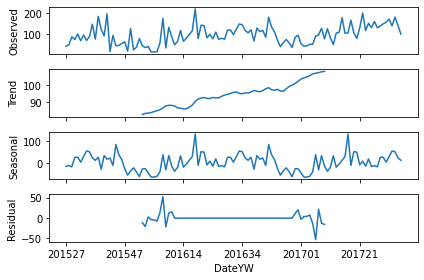

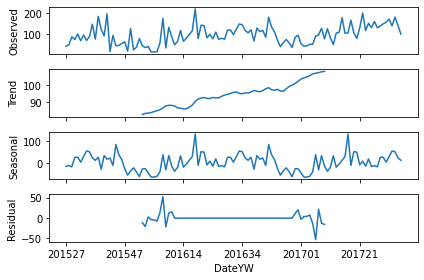

In [338]:
decomp=seasonal_decompose(dfYW,freq=52)
trend=decomp.trend
seasonal=decomp.seasonal
residuals=decomp.resid
decomp.plot()

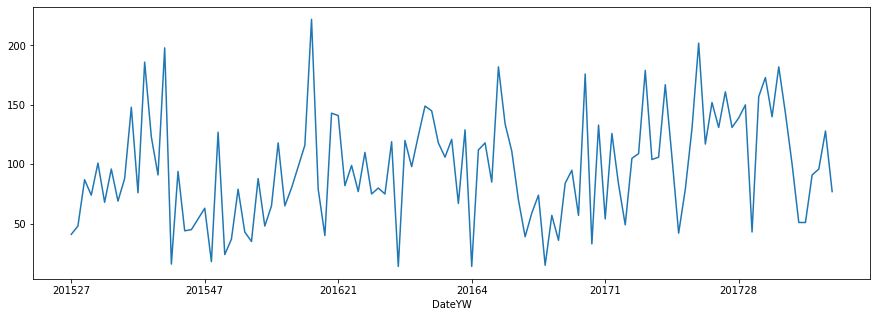

In [ ]:
ax=dfYW.plot(x='DateYW',y='IsCanceled',figsize=(15,5))

### ACF and PACF

Full ACF


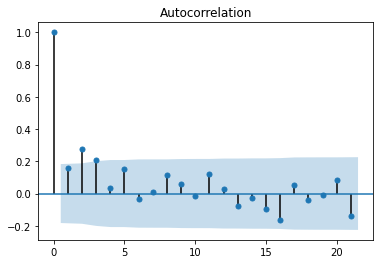

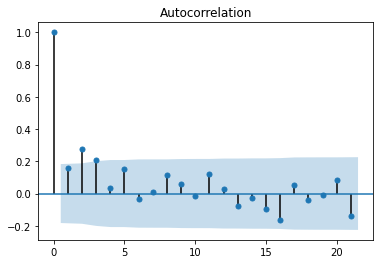

In [ ]:
print('Full ACF')
plot_acf(dfYW)

Partial ACF


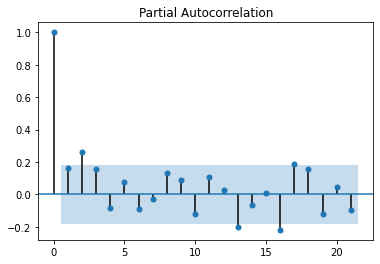

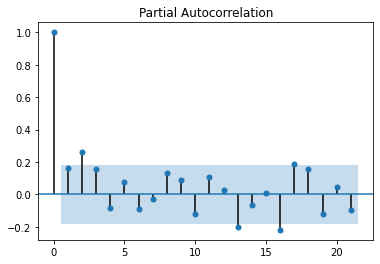

In [ ]:

print('Partial ACF')
plot_pacf(dfYW)

### Original and 4-Week SMA

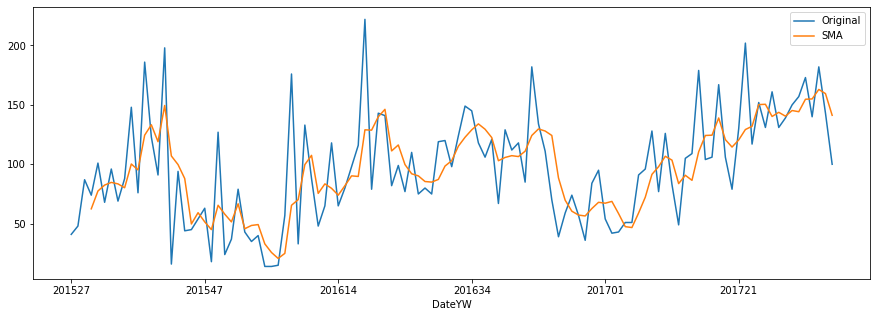

In [343]:
dfYWlag=dfYW.rolling(window=4).mean()
ax=dfYW.plot(x='DateYW',y='IsCanceled',figsize=(15,5))
ax=dfYWlag.plot(x='DateYW',y='IsCanceled',figsize=(15,5))
ax.legend(['Original', 'SMA'])

### Split

In [339]:
df_train=dfYW[0:round(len(dfYW)*0.90)]
df_test=dfYW[round(len(dfYW)*0.90):len(dfYW)]

DateYW
201725    131
201726    161
201727    131
201728    139
201729    150
201730    157
201731    173
201732    140
201733    182
201734    143
201735    100
Name: IsCanceled, dtype: int64